# 1-4. データ分析 - 主成分分析、次元削減
主成分分析（PCA）とは，データの情報をできるだけ失わないように，分散の値ができるだけ大きくなるような新しい軸を取り直すことで次元削減を行う手法である．本来これを行うためには固有値や固有ベクトル計算する必要があるが，PythonではScikit-learnモジュールを利用することで明示的に自分で計算する必要なく簡単にPCAを行うことができる．

[メディア芸術データベースのデータ](https://github.com/mediaarts-db/dataset)を利用して，簡単なPCAのサンプルコードを見ていこう．

ゲームの発売年、商品名の長さ、最大プレイ人数、パッケージの大きさからなるデータの主成分分析


## データセットの準備
以下では，[メディア芸術データベースのデータ](https://github.com/mediaarts-db/dataset)を利用する．
上記のリンクから「ゲームパッケージ」の「.json」ファイルをダウンロードした後，このノートブックにアップロードしよう．

ファイルサイズがとても大きいためアップロードには時間がかかる．ファイル名が反映されたことを確認するだけでなく，ファイルアップロード時の画面の下部にあるアップロードの進捗を示す円形のバーが全て進行するまで待ってから作業しよう．（およそ15分程度）

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib

json_open = open('/content/metadata_gm-item_gm301_00001.json', 'r')
json_load = json.load(json_open, strict=False)
df = pd.DataFrame(json_load["@graph"])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=fb31a85665c9f7cbcc8453efddeb8aad9830bb9d983c6a4eccadc103bc62a78b
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


## PCA

ゲームの価格，ゲームタイトルの長さ，最大プレイ人数，パッケージサイズの4次元からなるデータについて，主成分分析を行って2次元に圧縮していく．

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
import re
#データの前処理
after_df = pd.DataFrame()
after_df["lenname"]=df['name'].str.len()

def extract_max_number(string):
    numbers = re.findall(r'\d+', string)
    if numbers:
        return max(map(int, numbers))
    else:
        return 0
after_df["player"] =  df['numberOfPlayers'].astype(str).apply(extract_max_number)
after_df["size"] =  df['size'].astype(str).apply(extract_max_number)
after_df["price"] = df['price'].astype(str).apply(extract_max_number)

# 欠損値の処理
after_df.dropna(inplace=True)
for column in after_df.columns:
    after_df[column] = after_df[column].astype(int)
    after_df = after_df[after_df[column] != 0]
after_df = after_df[after_df["player"] < 50]
after_df = after_df[after_df["price"]<100000]

#データの正規化
for column in after_df.columns:
  normalized_data = (after_df[column] - after_df[column].min()) / (after_df[column].max() - after_df[column].min())
  after_df[column] = normalized_data

# 主成分分析の実行
pca = PCA()
pca.fit(after_df)

# 分析結果の取得
explained_variance_ratio = pca.explained_variance_ratio_
components = pca.components_

print("寄与率")
print(explained_variance_ratio)
print("主成分軸")
for i, component in enumerate(components):
    print(f"PC{i+1}: {component}")


寄与率
[0.49544559 0.36130937 0.13292933 0.01031571]
主成分軸
PC1: [0.00279892 0.3076039  0.09776951 0.94647405]
PC2: [-0.00298025  0.95147145 -0.02237078 -0.30690837]
PC3: [ 2.81067594e-04 -8.83243641e-03  9.94957430e-01 -9.99080673e-02]
PC4: [ 9.99991603e-01  1.97716838e-03 -6.19974722e-04 -3.53571484e-03]


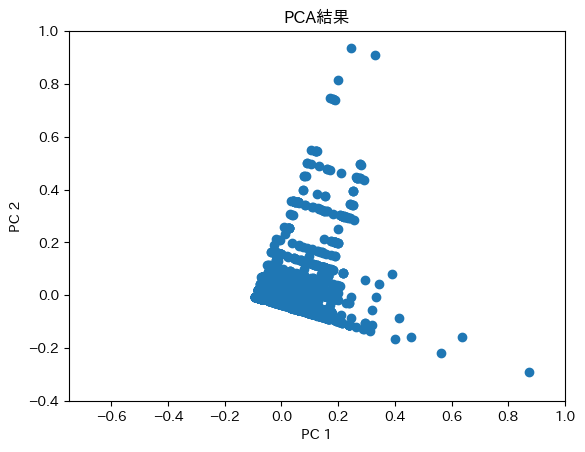

In [ ]:
# プロット
fig, ax = plt.subplots(dpi=100)
feature=pca.transform(after_df)
plt.scatter(feature[:, 0], feature[:, 1])
ax.set_xlim(-0.75, 1)
ax.set_ylim(-0.4, 1)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA結果')
plt.show()